In [25]:
import numpy as np
import COMSTABPY as csb
import matplotlib.pyplot as plt
import xarray as xr

In [26]:
#load the stability analysis module
stb = csb.comstab()

In [31]:
#load the data
ncname = 'result_deep_summer.nc'
ds = xr.open_dataset(ncname)
time = np.array(ds['time'][:])

In [32]:
#communities names: phytoplankton, zooplankton, total(B+P+Z)
communities = ['P','Z','TOT']

In [33]:
#create arrays where to save results
#we will save the mean along the depth axis and the standard deviation
cvs_mean = np.zeros((len(communities),4)) #CV_e,CV_tilde,CV_a,CV_c
cvs_std  = np.zeros((len(communities),4)) #CV_e,CV_tilde,CV_a,CV_c
stb_mean = np.zeros((len(communities),4)) #tau,Delta,psi,omega
stb_std  = np.zeros((len(communities),4)) #tau,Delta,psi,omega
rel_mean = np.zeros((len(communities),3)) #relative Delta,psi,omega
rel_std  = np.zeros((len(communities),3)) #relative Delta,psi,omega

In [34]:
#loop over the communities and perform the stability analysis
for icomm,community in enumerate(communities):
    data = np.array(ds[community])[:,:,:]
    #create array where to save the stability analysis at any depth
    cvs_arr           = np.zeros((data.shape[2],4)) # CVe, CVtilde, CVa, CVc
    stabilization_arr = np.zeros((data.shape[2],4)) # tau, delta, psi, omega
    relative_arr      = np.zeros((data.shape[2],3)) # delta_cont, psi_cont, omega_cont

    #loop over the depth
    for idepth in range(data.shape[2]):
        try:
            #remove rows with all nan values of temporal axis of data
            mask = np.isnan(data[:,:,idepth]).all(axis=1)
            result = stb.partition(data[~mask,:,idepth],stamp=False)
            cvs_arr[idepth]           = result['CVs']
            stabilization_arr[idepth] = result['Stabilization']
            relative_arr[idepth]      = result['Relative']
        except:
            cvs_arr[idepth]           = np.array([np.nan,np.nan,np.nan,np.nan])
            stabilization_arr[idepth] = np.array([np.nan,np.nan,np.nan,np.nan])
            relative_arr[idepth]      = np.array([np.nan,np.nan,np.nan])
            continue
    cvs_mean[icomm] = np.nanmean(cvs_arr,axis=0)
    cvs_std[icomm]  = np.nanstd(cvs_arr,axis=0)
    stb_mean[icomm] = np.nanmean(stabilization_arr,axis=0)
    stb_std[icomm]  = np.nanstd(stabilization_arr,axis=0)
    rel_mean[icomm] = np.nanmean(relative_arr,axis=0)
    rel_std[icomm]  = np.nanstd(relative_arr,axis=0)

Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's law is not significant, the analysis is not relevant.
Error: The fit of Taylor's l

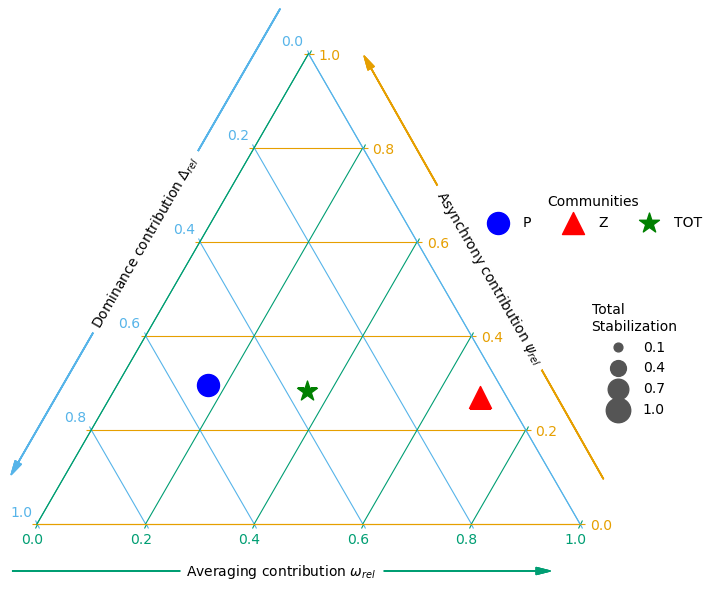

In [46]:
#Ternary plot
#please use numpy arrays for markers, labels and colors
markers = np.array(['o','^','*']) #use a different marker for each community
labels = np.array(['P','Z','TOT']) #label the communities
colors = np.array(['blue','red','green']) #use a different color for each community
arr_tau = stb_mean[:,0]

fig,ax = stb.ternaryplot(res=rel_mean,tau=arr_tau,sizelegend=True,marker=markers,labels=labels,color=colors,figname='ternary.png')


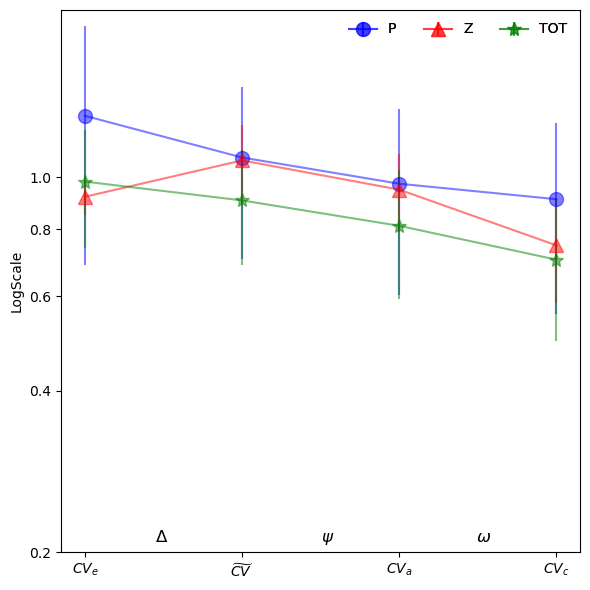

In [50]:
#Plot the CVs using the standard deviation as errorbars
fig,ax = stb.plotCV(CV_arr=cvs_mean,ylabel='LogScale',errorbar=cvs_std,marker=markers,labels=labels,color=colors,figname='CVs.png')




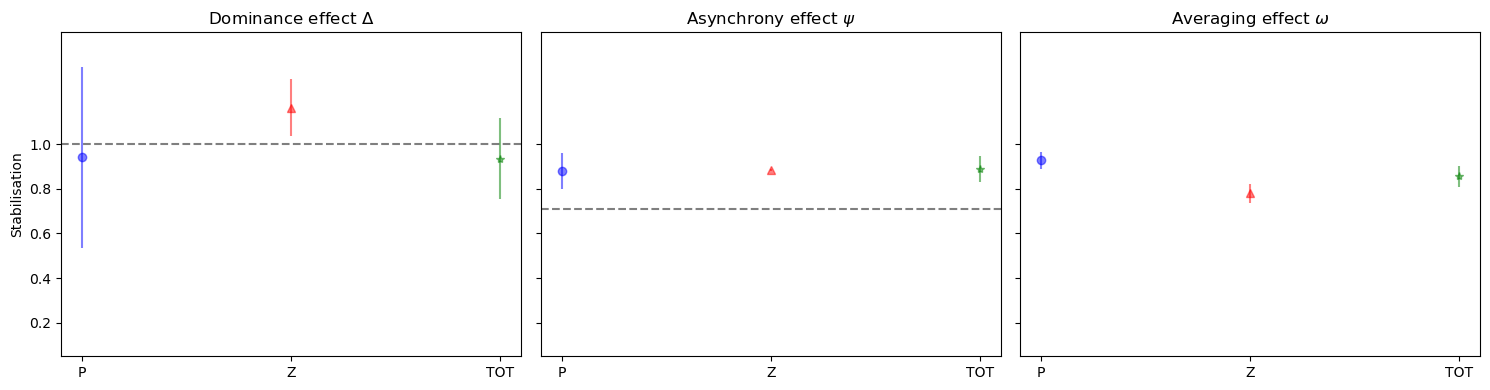

In [52]:
#Plot the stabilzing effects using the standard deviation as errorbars
effects = stb_mean[:,1:] #Delta,psi,omega
errors = stb_std[:,1:]   #Delta,psi,omega
fig,ax = stb.plotEFFECT(EFF=effects,ylogscale=False,errorbar=errors,marker=markers,labels=labels,color=colors,figname='effect.png')
